In [1]:
import os
# numerical computing package
import numpy as np
# basemap toolkit to plot maps
from mpl_toolkits.basemap import Basemap
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob2 import glob as gb
#
import time

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
figures_path = '/Users/earl/Dropbox/wombat_jra_mom025/figures/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_domain1 = 'erd561@raijin.nci.org.au:'
remote_path1 = '/g/data/ua8/JRA55-do/v1-3'
local_path1 = '/Users/earl/Desktop/alamanda/'
os.system('sshfs ' +
          remote_domain +
          remote_path + ' ' +
          local_path)

remote_domain2 = 'erd561@raijin.nci.org.au:'
remote_path2 = '/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1'
local_path2 = '/Users/earl/Desktop/bamboo/'
os.system('sshfs ' +
          remote_domain +
          remote_path + ' ' +
          local_path)

Figures will be saved in: /Users/earl/Dropbox/wombat_jra_mom025/figures/c01_year_to_year_variability



NameError: name 'remote_domain' is not defined

In [4]:
var = 't_10'
year = 1958
# print(os.listdir(local_path1))
# files = gb(local_path1 + var + '.' + str(year) + '*')
files = sorted(gb(local_path1 + var + '.' + '*' + '18Oct2017.nc'))
for f in files:
    print(f)

/Users/earl/Desktop/alamanda/t_10.1958.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1959.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1960.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1961.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1962.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1963.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1964.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1965.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1966.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1967.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1968.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1969.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1970.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1971.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1972.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1973.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1974.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1975.18Oct2017.nc
/Users/earl/Desktop/alamanda/t_10.1976.18Oct2017.nc
/Users/earl/

In [5]:
[os.path.join(local_path1, f) for f in files[0:2]]
print(files[0:2])

['/Users/earl/Desktop/alamanda/t_10.1958.18Oct2017.nc', '/Users/earl/Desktop/alamanda/t_10.1959.18Oct2017.nc']


In [6]:
%%time

from dask.distributed import Client
c = Client()
c

Client Scheduler: tcp://127.0.0.1:50219 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


In [11]:
%%time

ds = xr.open_mfdataset([os.path.join(local_path1, f) for f in files[0:2]], chunks={'longitude': 20})

tas_10m = ds.tas_10m
print(tas_10m)

<xarray.DataArray 'tas_10m' (time: 5840, latitude: 320, longitude: 640)>
dask.array<shape=(5840, 320, 640), dtype=float32, chunksize=(2920, 320, 20)>
Coordinates:
  * latitude   (latitude) float64 -89.57 -89.01 -88.45 -87.89 -87.33 -86.77 ...
  * longitude  (longitude) float64 0.0 0.5625 1.125 1.688 2.25 2.812 3.375 ...
  * time       (time) datetime64[ns] 1958-01-01 1958-01-01T03:00:00 ...
Attributes:
    units:          K
    long_name:      Near-Surface Air Temperature at the 10 meter height
    standard_name:  air_temperature
CPU times: user 36.9 ms, sys: 24 ms, total: 60.9 ms
Wall time: 66.7 ms


In [17]:
%%time

tas_10m_mean = tas_10m.sel(time=slice('1958-01-01', '1959-12-31')).mean(dim='time')
print(tas_10m_mean)

<xarray.DataArray 'tas_10m' (latitude: 320, longitude: 640)>
dask.array<shape=(320, 640), dtype=float32, chunksize=(320, 20)>
Coordinates:
  * latitude   (latitude) float64 -89.57 -89.01 -88.45 -87.89 -87.33 -86.77 ...
  * longitude  (longitude) float64 0.0 0.5625 1.125 1.688 2.25 2.812 3.375 ...
CPU times: user 7.07 ms, sys: 1.37 ms, total: 8.43 ms
Wall time: 7.28 ms


KeyboardInterrupt: 

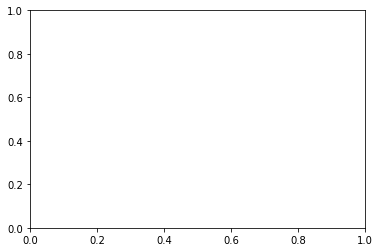

In [18]:
%%time

plt.contourf(tas_10m_mean)